# Standardization

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url='https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv'
df = pd.read_csv(url)

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
#Chossing Columns
df = df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
240,42,149000,1
128,30,17000,0
309,38,50000,0
75,34,112000,1
323,48,30000,1


In [6]:
test = df.drop('Purchased',axis=1)

In [7]:
test.sample(3)

,Age,EstimatedSalary
108,26,86000
163,35,38000
288,41,79000


# Test Train Split

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(test,df['Purchased'],
                                                 test_size=0.3,random_state=0)

In [9]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

# Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fitting 
scaler.fit(X_train)

# Transforming
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [15]:
'''
After Applying Standard Scaler Scaling, Mean becomes 0
and Standard Deviation becomes 1.
Because of Mean Centric Standardization Squishing.
'''
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


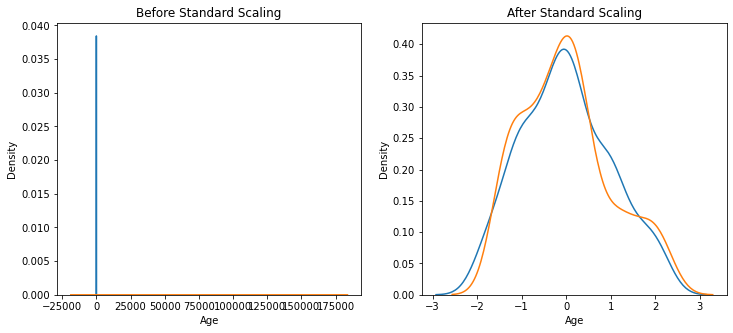

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Before Standard Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [19]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [21]:
from sklearn.metrics import accuracy_score
print("Without Scaling Accuracy : ",accuracy_score(y_test,y_pred)*100)
print("With Scaling Accuracy    : ",accuracy_score(y_test,y_pred_scaled)*100)

Without Scaling Accuracy :  65.83333333333333
With Scaling Accuracy    :  86.66666666666667
